<a href="https://colab.research.google.com/github/usman-shahbaz/exploratory-data-analysis-tasks/blob/main/Exploratory_Data_Analysis_Task_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv("births.csv")

df.head()


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


##Q.1: Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.


In [35]:
df["Decade"] = (df["year"] // 10) * 10


##Q.2: Show the descriptive statistics of the data.


In [36]:
print(df.describe())


               year         month           day         births        Decade
count  15547.000000  15547.000000  15067.000000   15547.000000  15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561   1974.544285
std        6.728340      3.449632     15.284034   28552.465810      6.789583
min     1969.000000      1.000000      1.000000       1.000000   1960.000000
25%     1974.000000      4.000000      8.000000    4358.000000   1970.000000
50%     1979.000000      7.000000     16.000000    4814.000000   1970.000000
75%     1984.000000     10.000000     24.000000    5289.500000   1980.000000
max     2008.000000     12.000000     99.000000  199622.000000   2000.000000


##Q.3: Check if your data contains any missing values.


In [37]:
print(df.isnull().sum())


year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64


##Q.4: What is the trend of male & female births every decade.


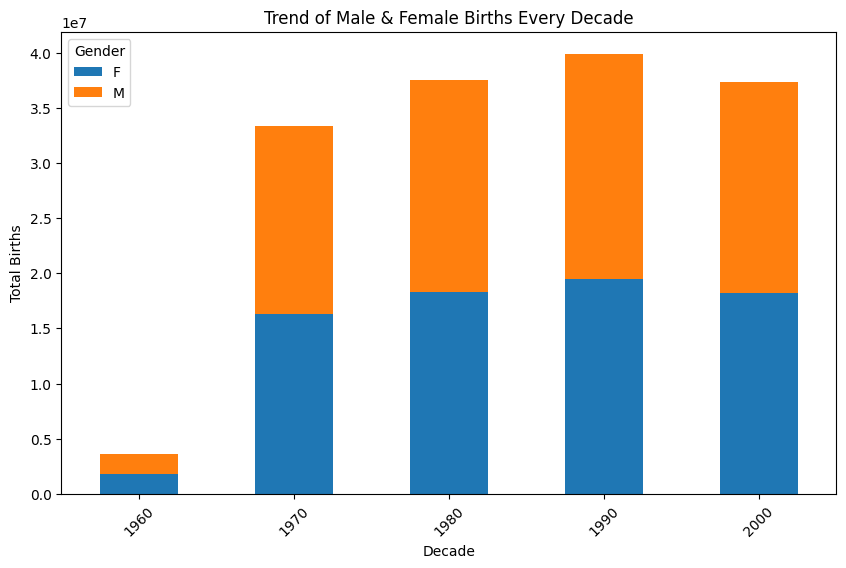

In [38]:
births_by_decade_gender = df.groupby(['Decade', 'gender'])['births'].sum().unstack()

births_by_decade_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Trend of Male & Female Births Every Decade')
plt.xlabel('Decade')
plt.ylabel('Total Births')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

##Q.5: To remove outliers from dataset following techinque to include only those values that fall within 5 standard deviations from the mean.This is a common statistical technique used to focus on the central tendency of the data while excluding extreme values.

In [39]:
mean_births = df['births'].mean()
std_births = df['births'].std()

upper_bound = mean_births + 5 * std_births
lower_bound = mean_births - 5 * std_births

births_df_filtered = df[(df['births'] >= lower_bound) & (df['births'] <= upper_bound)]



##Q.6: Plot births by weekday for several decades. Write down your observation.


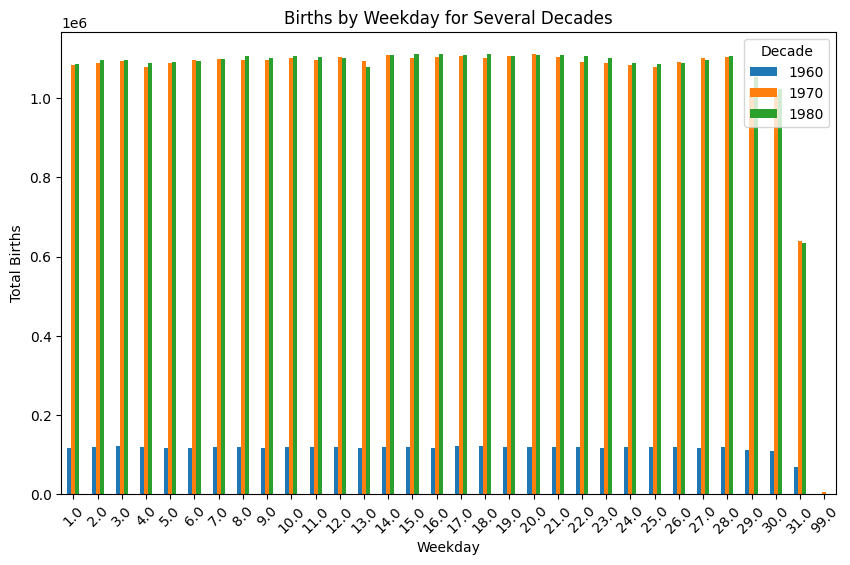

In [40]:
births_by_weekday_decade = df.groupby(['day', 'Decade'])['births'].sum().unstack()

births_by_weekday_decade.plot(kind='bar', figsize=(10, 6))
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Weekday')
plt.ylabel('Total Births')
plt.xticks(rotation=45)
plt.legend(title='Decade')
plt.show()

##Q.7: Group the data by month and day separately.


In [41]:
births_by_month = df.groupby('month')['births'].sum()

births_by_day = df.groupby('day')['births'].sum()


##Q.8: Focusing on the month and day only, you have a time series reflecting the average number of births by date of the year. From this, plot the data.

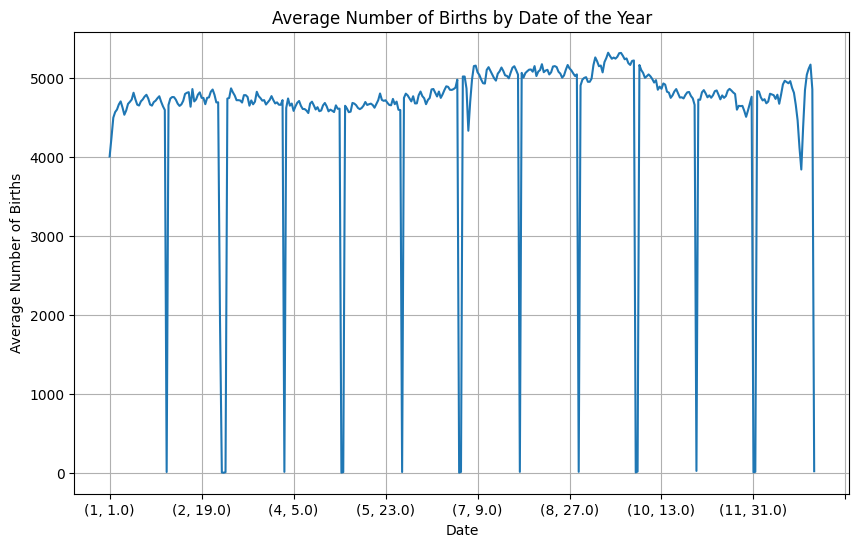

In [42]:
births_by_date = df.groupby(['month', 'day'])['births'].mean()

plt.figure(figsize=(10, 6))
births_by_date.plot()
plt.title('Average Number of Births by Date of the Year')
plt.xlabel('Date')
plt.ylabel('Average Number of Births')
plt.grid(True)
plt.show()
